# PyMech

<div align="center">
   <img src='PyMech_logo.png' width='80'/>
</div>

*Ian Viotti, 2022*

# Particle Swarm Optimization (PSO)

 ----

<div align="center">
   <img src='PSO_img.jpeg' width='300'/>
</div>

# Teoria de PSO

Baseada na **inteligência de enxames** para buscar no domínio da função valores ótimos globais e **não ficar presa em ótimos locais**.

<div align="center">
    <img src='PSO_iteration.png' width='500'/>
</div>

A **posição** e a **velocidade** de cada partícula é atualizada a cada **iteração**.

## Vetor posição

$ \vec{X_i(t+1)} = \vec{X_i(t)} + \vec{V_i(t+1)} $


## Vetor velocidade

$\vec{V(t+1)} = w\vec{V_i(t)} + c_1r_1(\vec{P_i(t)} - \vec{x_i(t)}) + c_2 r_2 (\vec{G_t} - \vec{x_i(t)})$

- $P_i(t) =$ Melhor solução encontrada **pela partícula $i$** até a iteração $t$.
- $G(t) =$ Melhor solução encontrada **por todas as partículas** até a iteração $t$.

## Parâmetros


- $w$: Parâmetro **inercial** - Tendência em continuar seguindo seu caminho;
- $c_1$: Parâmetro **cognitivo** - Tendência de ir para melhor valor encontrado pela partícula;
- $c_2$: Parâmetro **social** - Tendência de ir ao melhor valor encontrado por todas as partículas.

# Função

## Funções de teste (benchmark)

<div align="center">
    <img src="benchmark_fun.png" width="500"/>
</div>

## Função de Rastrigin

<div align="center">
    <img src="Rastrigin.jpg" width="700"/>
</div>

- Não-convexa
- Multi-modal
- Grande número de mínimos locais


**Formulação matemática**

$f(x) = A_n + \sum_{i=1}^n [x_i^2 - Acos(2\pi x_i)]$

- $n$: Número de dimensões
- $A=10$
- $A_n = 20$
- $x_i \in [-5,12; 5,12]$
- Mínimo global = 0 em [0,0]

In [1]:
import numpy as np

def rastrigin(x):
    '''Calcula o valor da função de Rastrigin de 2 dimensões para todas as partículas
    
    Parameters
    ----------
    x: list
        Listas com lista contendo o valor das variáveis x e y para todas as partículas.
        Ex: 2 dimensões e 4 partículas [
                                        [1.0, 2.1],
                                        [-4.5, 1.8],
                                        [2.9, 3.3],
                                        [4.4, -0.5]
                                        ]
                                        
    Returns
    -------
    Z: list
        Lista com retornando o valor da função de Rastrigin para cada partícula.
        Ex: 4 partículas [10.1, 15.8, 22.0, 30.5]
    '''
    
    # Checa se os valores estão no intervalo admitido.
    if not np.logical_and(x >= -5.12, x <= 5.12).all():
        raise ValueError(
            "Variáveis da função de Rastrigin devem estar no intervalo [-5.12, 5.12]."
        )
        
    A = 10
    An = 20
    # Calcula o valor da função para cada partícula.
    Z = (x[:, 0]**2 - A * np.cos(2 * np.pi * x[:, 0])) + (x[:, 1]**2 - A * np.cos(2 * np.pi * x[:, 1])) + An
    return Z 

# PySwarms

<div align="center">
    <img src="pyswarms.jpg" width="800"/>
</div>

> Miranda L.J., (2018). PySwarms: a research toolkit for Particle Swarm Optimization in Python. Journal of Open Source Software, 3(21), 433, https://doi.org/10.21105/joss.00433

> https://github.com/ljvmiranda921/pyswarms

> pip install `pyswarms`

---

## Módulos

In [2]:
import pyswarms as ps

In [9]:
# Input dos parâmetros (w: Inercial, c1: cognitivo, c2: Social)
parametros = {'w': 0.5, 'c1': 1.5, 'c2': 0.8}

# Limites
lim = ([-5.12, -5.12], [5.12, 5.12])

# Definir otimizador
optimizer = ps.single.GlobalBestPSO(n_particles = 20, dimensions = 2, 
                                    options = parametros, bounds = lim
                                   )

# Chama o otimizador
cost, pos = optimizer.optimize(rastrigin, iters=300)

2022-06-03 16:11:44,546 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'w': 0.5, 'c1': 1.5, 'c2': 0.8}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████████|300/300, best_cost=0
2022-06-03 16:11:46,294 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [-2.74998077e-09  5.12007499e-10]


In [10]:
print(' Custo: ', cost)
print('\n Posição: ', pos)

 Custo:  0.0

 Posição:  [-2.74998077e-09  5.12007499e-10]


## Plot

In [11]:
from pyswarms.utils.plotters import plot_contour, plot_surface, plot_cost_history
from pyswarms.utils.plotters.formatters import Designer, Mesher

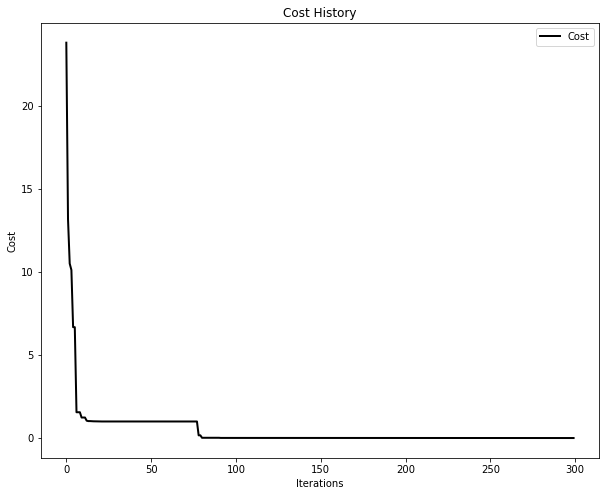

In [12]:
cost_plot = plot_cost_history(cost_history = optimizer.cost_history)
cost_plot.figure.savefig('file_name.jpg')

In [ ]:
# Malha da função
m = Mesher(func=rastrigin, limits=[(-5.12, 5.12), (-5.12, 5.12)], 
           levels=np.arange(-2, 80.0, 8))

# Design do plot
d = Designer(limits=[(-5.12,5.12), (-5.12,5.12), (-1,100)], 
             label=['x-axis', 'y-axis'])

# Animação
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0), designer = d)

# Salvar aninamçã0
animation.save('file_name.gif', fps=10)

# Qualidade dos parâmetros

## Alta convergência

| Param | w | c1 | c2 | Cost | Pos |
| ----- | - | -- | -- | ---- | --- |
| Valor | 0.1 | 0.0 | 2.0 | 1.99  | [-0.99, -0.99] |

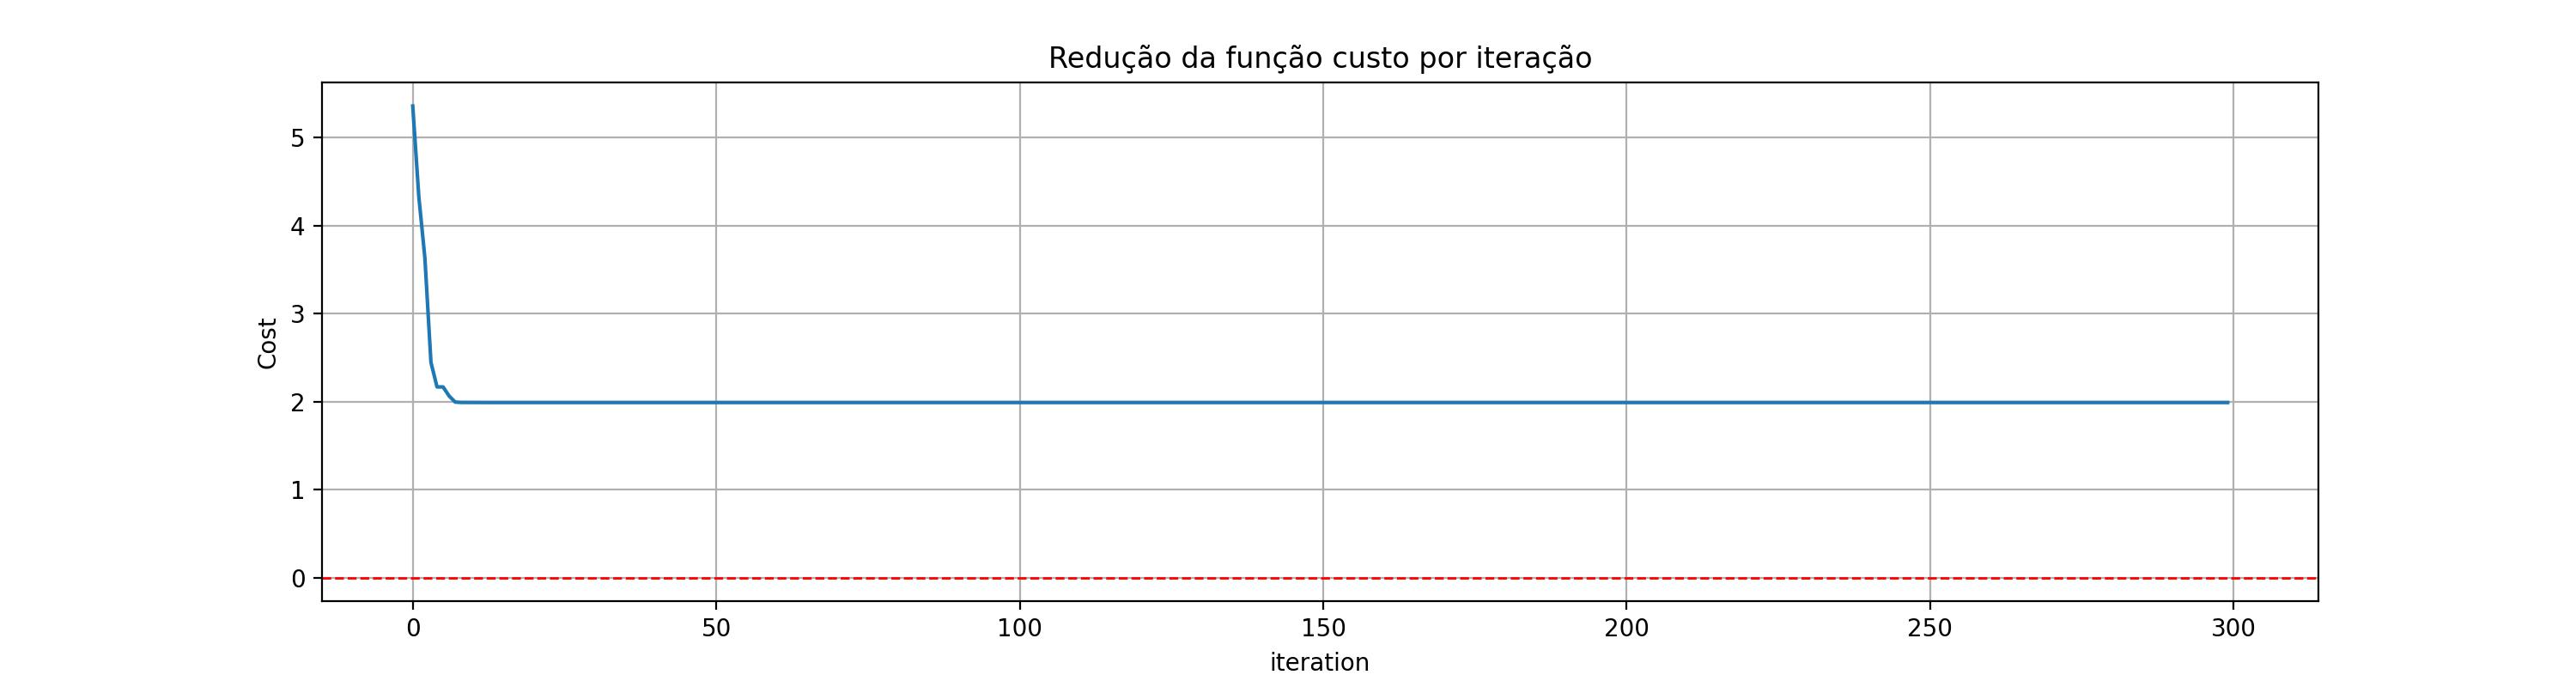

## Alta exploração

| Param | w | c1 | c2 | Cost | Pos |
| ----- | - | -- | -- | ---- | --- |
| Valor | 2.0| 0.6 | 0.1 | 1.64  | [-0.06, -0.99] |

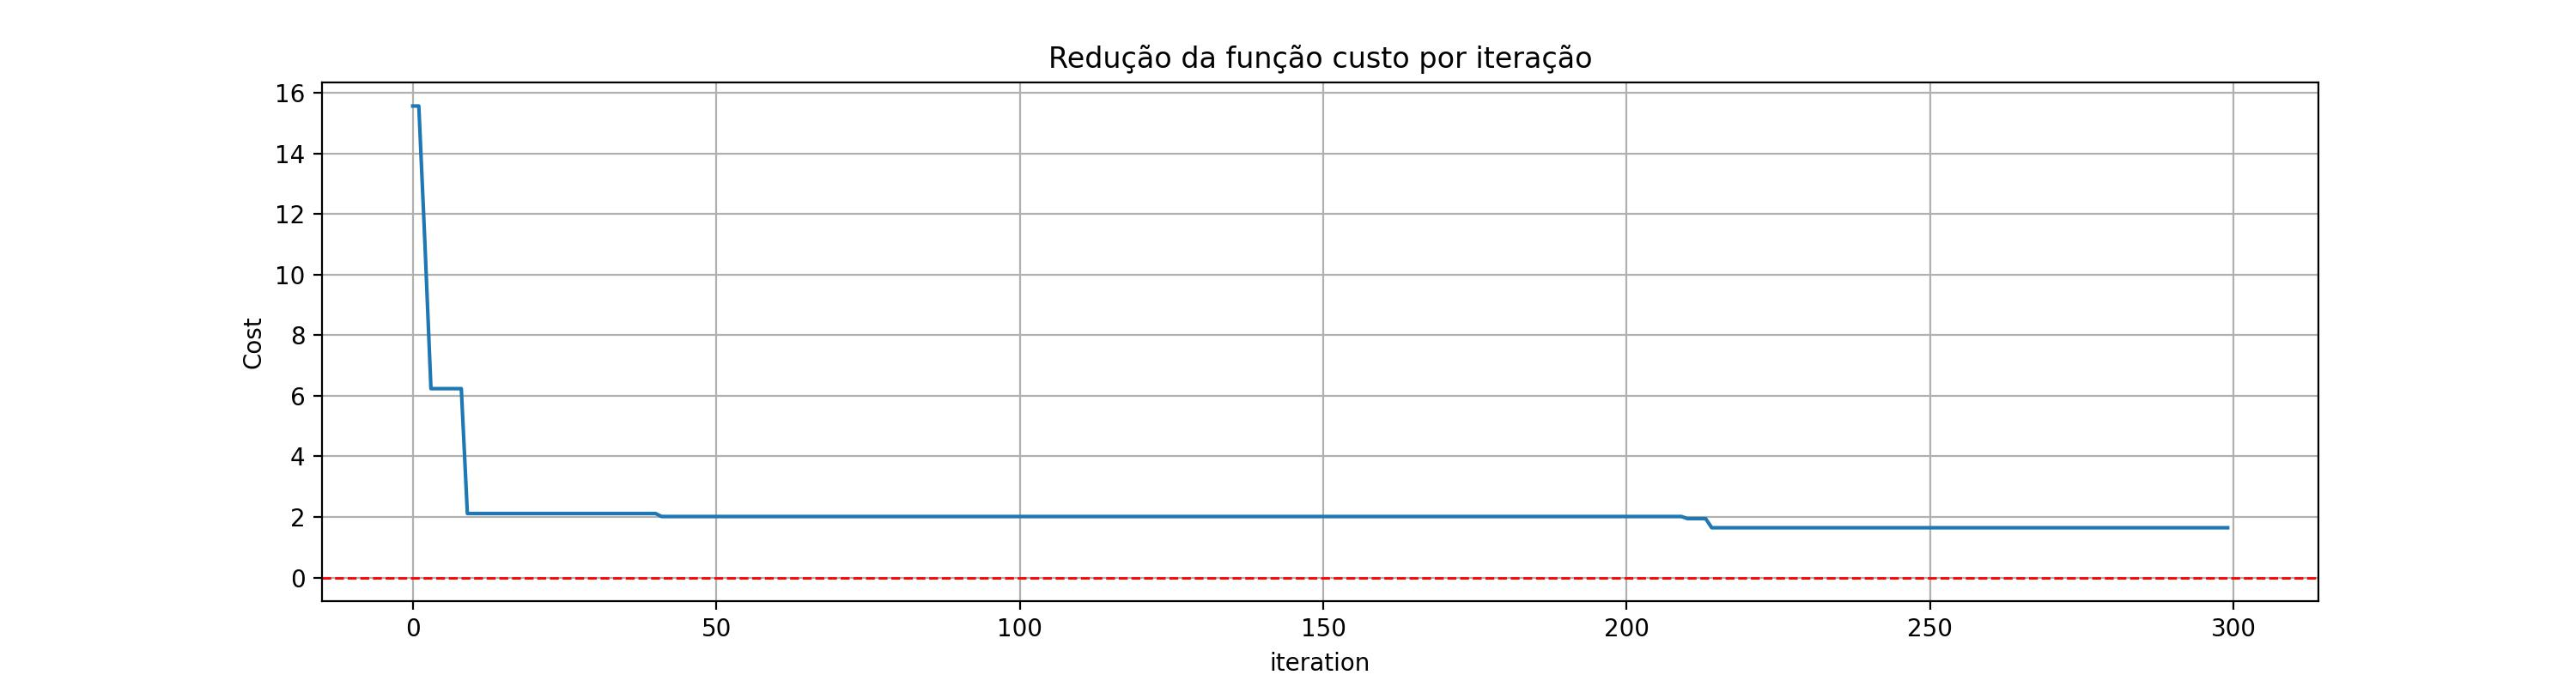

## Ideal

| Param | w | c1 | c2 | Cost | Pos |
| ----- | - | -- | -- | ---- | --- |
| Valor | 0.5 | 1.5 | 0.8 | 0.0  | [0.00, 0.00] |

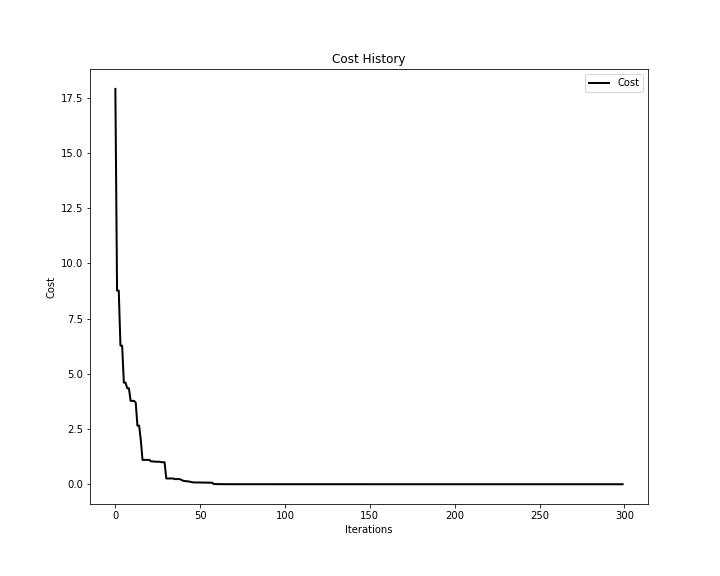

<div align="center">
   <img src='PyMech_logo.png' width='300'/>
</div>
